In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("insurance_data.csv")

# Feature scaling
scaler = StandardScaler()
df['age_scaled'] = scaler.fit_transform(df[['age']])
df['affordibility_scaled'] = scaler.fit_transform(df[['affordibility']])

# Split the dataset into training and testing sets
X = df[['age_scaled', 'affordibility_scaled']]
y = df['bought_insurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [3]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(2,), activation='relu'),   
    keras.layers.Dense(8, activation='relu'),                      
    keras.layers.Dense(1, activation='sigmoid')                    
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)



C:\Users\gauta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(
    X_train, y_train, 
    epochs=1000, 
    validation_split=0.2, 
    callbacks=[early_stopping]
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")



Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4706 - loss: 0.7566 - val_accuracy: 0.6000 - val_loss: 0.7157
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4706 - loss: 0.7518 - val_accuracy: 0.6000 - val_loss: 0.7113
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4706 - loss: 0.7472 - val_accuracy: 0.6000 - val_loss: 0.7068
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4706 - loss: 0.7426 - val_accuracy: 0.6000 - val_loss: 0.7023
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4706 - loss: 0.7380 - val_accuracy: 0.6000 - val_loss: 0.6979
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4706 - loss: 0.7334 - val_accuracy: 0.6000 - val_loss: 0.6936
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4706 - loss: 0.7290 - val_accuracy: 0.6000 - val_loss: 0.6892
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4706 - loss: 0.7245 - val_accuracy: 0.6000 - val

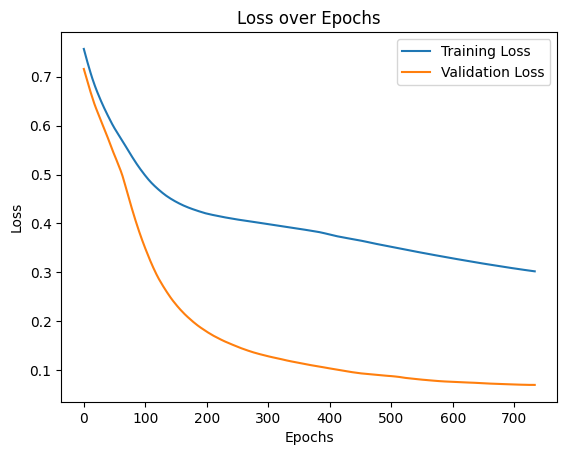

In [5]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


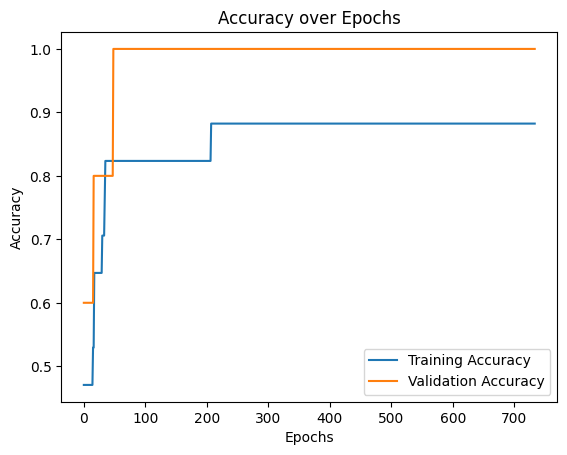

In [6]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()